# Preictal Features

We explore AR coefficient response to several samples of 15 mins of pre-ictal data. Pre-ictal in this analysis refers to the 15 mins of interval directly preceeding a seizure.

In [58]:
import os
import re
import mne
import numpy as np
import matplotlib.pyplot as plt
from ARMA import ARMA

In [59]:
root = '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/'
figroot = '../figures/feature_extraction/preictal/'

In [60]:
# filter out files from interictal class
regex = re.compile(r'^(' \
                   'chb01_03\.edf|chb01_04\.edf|chb01_15\.edf|' \
                   'chb01_16\.edf|chb01_18\.edf|chb01_26\.edf|' \
                   '\.(seizures)|\.(txt)|\.(html)' \
                  ')$')
preictal_files = [root+x for x in os.listdir(root) if regex.search(x)]

In [61]:
preictal_files

['/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf',
 '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf',
 '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_15.edf',
 '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_16.edf',
 '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_18.edf',
 '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_26.edf']

## Visualise EEG

During visualisation, we extend the preictal segment to include the ictal segment so we can observe the transition from preictal to ictal.

In [62]:
# plot parameters
plot_kwargs = {
    'scalings': dict(eeg=45e-5), # manually set scale to 500 uV for 'best' representation (25e-5)
    'show_scrollbars': False,
    'show_scalebars': False,
    'show': True
}

In [63]:
raws = [mne.io.read_raw_edf(input_fname=x, preload=False, verbose='Error') for x in preictal_files]
len(raws)

6

In [9]:
raws[0].set_annotations(mne.Annotations(2996, 100, 'Seizure')) # params: start time, duration, description
raws[1].set_annotations(mne.Annotations(1467, 27, 'Seizure'))
raws[2].set_annotations(mne.Annotations(1732, 40, 'Seizure'))
raws[3].set_annotations(mne.Annotations(1015, 51, 'Seizure'))
raws[4].set_annotations(mne.Annotations(1720, 100, 'Seizure'))
raws[5].set_annotations(mne.Annotations(1862, 101, 'Seizure'));

In [8]:
# raw_crop_1 = raws[0].crop(tmin=2096, tmax=2996+300)
# raw_crop_2 = raws[1].copy().crop(tmin=567, tmax=1467+300)
# raw_crop_3 = raws[2].copy().crop(tmin=832, tmax=1732+300)
# raw_crop_4 = raws[3].copy().crop(tmin=115, tmax=1015+300)
# raw_crop_5 = raws[4].copy().crop(tmin=820, tmax=1720+300)
# raw_crop_6 = raws[5].copy().crop(tmin=962, tmax=1862+300)

In [30]:
annot = mne.Annotations(onset=[0, 2996, 2996-900], 
                        duration=[2996-900, 100, 900],
                        description=['Interictal', 'Ictal', 'Preictal'])
raws[0].set_annotations(annot)

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~26 kB, data not loaded>

In [54]:
events, event_id = mne.events_from_annotations(raws[0])
# events = mne.find_events(raws[0])
event_id

Used Annotations descriptions: ['Ictal', 'Interictal', 'Preictal']


{'Ictal': 1, 'Interictal': 2, 'Preictal': 3}

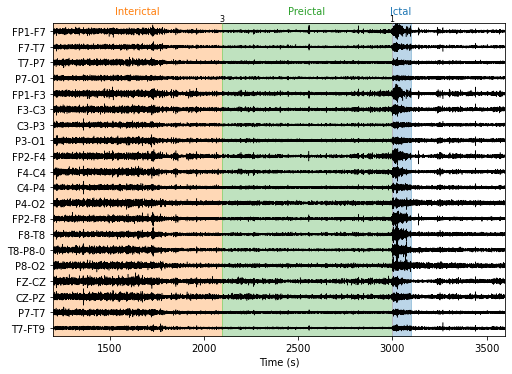

In [56]:
fig = raws[0].plot(events=events, start=2996-(900*2), duration=900*4, 
                   event_color={2:'lightblue', 3:'lightgreen', 1:'pink'},
                   **plot_kwargs);
# fig.savefig(figroot + preictal_files[0].split('/')[-1].split('.')[0] + '.pdf')

In [88]:
annot = mne.Annotations(onset=[2996-200, 2996, 2996+100], 
                        duration=[200, 100, 3600],
                        description=['Preictal', 'Ictal', 'Interictal'])
raws[0].set_annotations(annot)

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~26 kB, data not loaded>

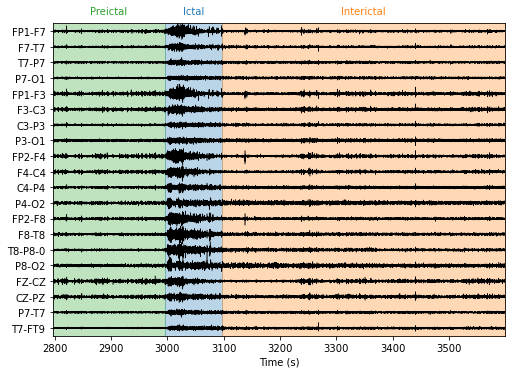

In [90]:
fig = raws[0].plot(start=2996-200, duration=900*4, **plot_kwargs);
fig.savefig(figroot + preictal_files[0].split('/')[-1].split('.')[0] + '_phase_transition_example' + '.pdf')

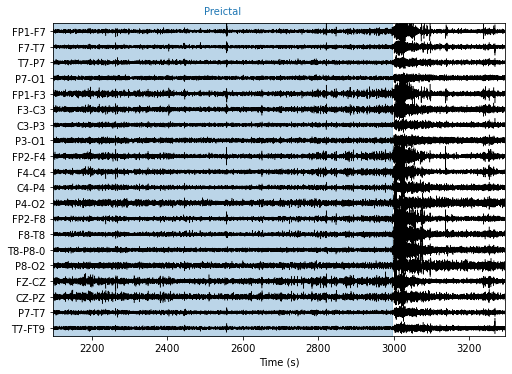

In [28]:
fig = raws[0].plot(start=2096, duration=900+300, **plot_kwargs);
# fig.savefig(figroot + preictal_files[0].split('/')[-1].split('.')[0] + '.pdf')

In [10]:
# raws[0].plot_psd(area_mode='range', tmax=10.0, picks='all', average=False);

In [11]:
# raws[0].load_data()
# raws[0].notch_filter(np.arange(60, 127, 60), picks='all', filter_length='auto',
#                  phase='zero')
# raws[0].plot_psd(area_mode='range', tmax=10.0, picks='all', average=False)

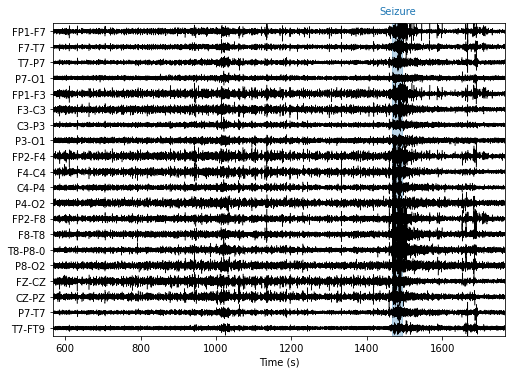

In [12]:
fig = raws[1].plot(start=567, duration=900+300, **plot_kwargs);
fig.savefig(figroot + preictal_files[1].split('/')[-1].split('.')[0] + '.pdf')

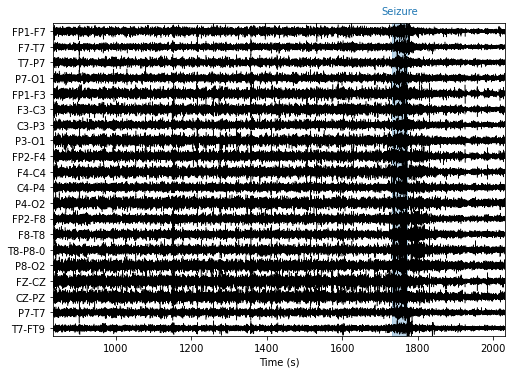

In [13]:
fig = raws[2].plot(start=832, duration=900+300, **plot_kwargs);
fig.savefig(figroot + preictal_files[2].split('/')[-1].split('.')[0] + '.pdf')

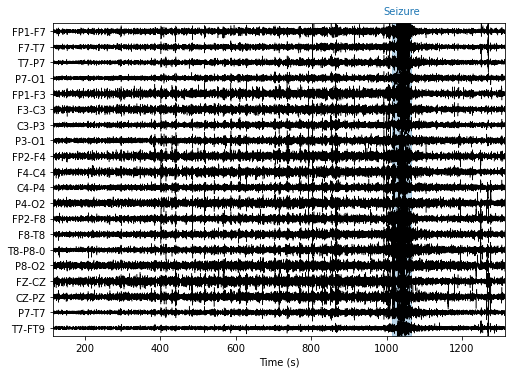

In [14]:
fig = raws[3].plot(start=115, duration=900+300, **plot_kwargs);
fig.savefig(figroot + preictal_files[3].split('/')[-1].split('.')[0] + '.pdf')

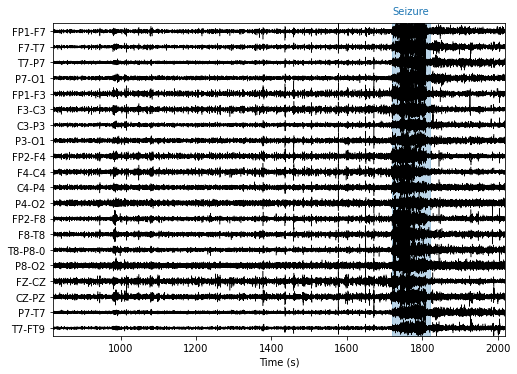

In [15]:
fig = raws[4].plot(start=820, duration=900+300, **plot_kwargs);
fig.savefig(figroot + preictal_files[4].split('/')[-1].split('.')[0] + '.pdf')

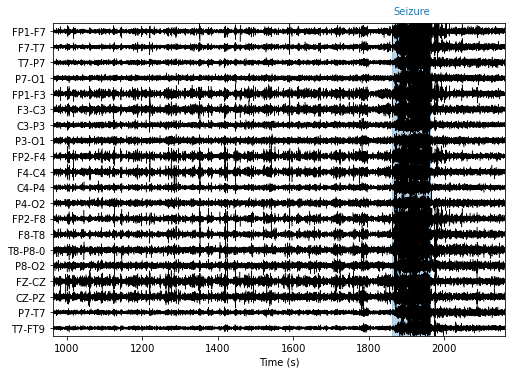

In [16]:
fig = raws[5].plot(start=962, duration=900+300, **plot_kwargs);
fig.savefig(figroot + preictal_files[5].split('/')[-1].split('.')[0] + '.pdf')

## Visualise AR Response

In [17]:
# get visualised data as numpy array
raws_0_EEG, raws_0_times = raws[0].get_data(picks='all', units='uV', return_times=True)
raws_1_EEG, raws_1_times = raws[1].get_data(picks='all', units='uV', return_times=True)
raws_2_EEG, raws_2_times = raws[2].get_data(picks='all', units='uV', return_times=True)
raws_3_EEG, raws_3_times = raws[3].get_data(picks='all', units='uV', return_times=True)
raws_4_EEG, raws_4_times = raws[4].get_data(picks='all', units='uV', return_times=True)
raws_5_EEG, raws_5_times = raws[5].get_data(picks='all', units='uV', return_times=True)

print(raws_0_EEG.shape, raws_0_times.shape)
print(raws_1_EEG.shape, raws_1_times.shape)
print(raws_2_EEG.shape, raws_2_times.shape)
print(raws_3_EEG.shape, raws_3_times.shape)
print(raws_4_EEG.shape, raws_4_times.shape)
print(raws_5_EEG.shape, raws_5_times.shape)

(23, 921600) (921600,)
(23, 921600) (921600,)
(23, 921600) (921600,)
(23, 921600) (921600,)
(23, 921600) (921600,)
(23, 595200) (595200,)


In [18]:
# initialise ARMA parameters
seed = 42
fs = raws[0].info['sfreq'] # assume all data have the same sampling frequency
N = 500
p = 2
m = 5
ar = ARMA(window_width=N, order=p, memory=m, seed=seed)

In [19]:
raws_0_times_ARMA, raws_0_sig_AR, raws_0_sig_MA = ar.spin(sig=raws_0_EEG, fs=fs)
raws_1_times_ARMA, raws_1_sig_AR, raws_1_sig_MA = ar.spin(sig=raws_1_EEG, fs=fs)
raws_2_times_ARMA, raws_2_sig_AR, raws_2_sig_MA = ar.spin(sig=raws_2_EEG, fs=fs)
raws_3_times_ARMA, raws_3_sig_AR, raws_3_sig_MA = ar.spin(sig=raws_3_EEG, fs=fs)
raws_4_times_ARMA, raws_4_sig_AR, raws_4_sig_MA = ar.spin(sig=raws_4_EEG, fs=fs)
raws_5_times_ARMA, raws_5_sig_AR, raws_5_sig_MA = ar.spin(sig=raws_5_EEG, fs=fs)

100%|██████████| 594698/594698 [00:06<00:00, 93078.81it/s] 


In [20]:
print(raws_0_sig_AR.shape, raws_0_sig_MA.shape, raws_0_times_ARMA.shape)
print(raws_1_sig_AR.shape, raws_1_sig_MA.shape, raws_1_times_ARMA.shape)
print(raws_2_sig_AR.shape, raws_2_sig_MA.shape, raws_2_times_ARMA.shape)
print(raws_3_sig_AR.shape, raws_3_sig_MA.shape, raws_3_times_ARMA.shape)
print(raws_4_sig_AR.shape, raws_4_sig_MA.shape, raws_4_times_ARMA.shape)
print(raws_5_sig_AR.shape, raws_5_sig_MA.shape, raws_5_times_ARMA.shape)

(1842, 23, 2) (1842, 23, 2) (1842,)
(1842, 23, 2) (1842, 23, 2) (1842,)
(1842, 23, 2) (1842, 23, 2) (1842,)
(1842, 23, 2) (1842, 23, 2) (1842,)
(1842, 23, 2) (1842, 23, 2) (1842,)
(1189, 23, 2) (1189, 23, 2) (1189,)


In [21]:
t = np.arange(0, len(raws_0_times_ARMA)) / (fs/N)
ch_names = raws[0].info['ch_names']

In [22]:
figsize_hor, figsize_ver = 12, 10
colors = ['dodgerblue', 'deepskyblue'] # AR param colors - must be same as AR(order)
legend_pos = 2

Use the following diagram to match electrode name to its position.

![](http://www.bem.fi/book/13/fi/1302a.gif)

In [23]:
# channel mapping (needed for plot topomap/sensor)
ch_map = {
    'FP1-F7' : 'FP1', # dup
     'F7-T7' : 'F7',
     'T7-P7' : 'T7',
     'P7-O1' : 'P7', # dup
     'FP1-F3' : 'F3', # dup
     'F3-C3' : 'F3',
     'C3-P3' : 'C3',
     'P3-O1' : 'P3',
     'FP2-F4' : 'FP2', # duplicate
     'F4-C4' : 'F4',
     'C4-P4' : 'C4',
     'P4-O2' : 'P4',
     'FP2-F8' : 'FP2', # duplicate
     'F8-T8' : 'F8',
     'T8-P8-0' : 'T8',
     'P8-O2' : 'P8',
     'FZ-CZ' : 'FZ',
     'CZ-PZ' : 'CZ',
     'P7-T7' : 'P7', # dup
     'T7-FT9' : 'T7',
     'FT9-FT10' : 'FT9',
     'FT10-T8' : 'FT10',
     'T8-P8-1' : ' T8' # dup
}

# The principal brain areas are pre-frontal (Fp), frontal (F), central (C), 
# temporal (T), parietal (P), and occipital (O). Regarding their lateralized 
# location, odd numbers (1,3,5,7) refer to electrodes placed on the left 
# hemisphere, even numbers (2,4,6,8) refer to those on the right hemisphere, 
# whereas electrodes over the midline (zero line) are labeled with the letter “z”. 

ideal_map = {
    # Fp (1,3,5,7)
    'FP1-F7' : 'Fp1',

    # F (1,3,5,7)
    'F7-T7' : 'F7',
    'FP1-F3' : 'F3',
    # C (1,3,5,7)
    'F3-C3' : 'C3',
    # T (1,3,5,7)
    'T7-FT9' : 'T7',
#     'P7-T7' : 'T7',
    # P (1,3,5,7)
    'T7-P7' : 'P7',
    'C3-P3' : 'P3',
    # O (1,3,5,7)
    'P3-O1' : 'O1',
#     'P7-O1' : 'O1',
    
    # Fp (2,4,6,8)
    'FP2-F4' : 'Fp2',
    # F (2,4,6,8)
    'F4-C4' : 'F4',
    'FP2-F8' : 'F8',
    # C (2,4,6,8)
    'C4-P4' : 'C4',
    # T (2,4,6,8)
    'F8-T8' : 'T8',
#     'T8-P8-1' : ' T8',
    # P (2,4,6,8)
    'P4-O2' : 'P4',
    'T8-P8-0' : 'P8',
    # O (2,4,6,8)
    'P8-O2' : 'O2',
    
    # midline (z)
    'FZ-CZ' : 'Fz',
    'CZ-PZ' : 'Pz',
    
    # reference
    'FT9-FT10' : 'Ft9',
    'FT10-T8' : 'Ft10',
}

In [24]:
def create_subplot(x, y, ch, name, color='k', ax=None):
    if ax is None:
        ax = plt.gca()
    plot = ax.plot(x, y[ch,:], label=name, color=color)
    ax.legend(loc=4)
    return plot

def create_multisubplot(x, y, ch, p, script, colors=['dodgerblue', 'deepskyblue'], ax=None):
    for i in range(p):
        ax.plot(x, y[:,ch,i], label=(r'$' + script + '_{0}$'.format(i+1)), color=colors[i])
    ax.legend(loc=4)

def plot_ARMA_response(times_EEG, times_ARMA, sig_EEG, sig_AR, sig_MA, ch_idx, ch_names, N, fs, annot_start, annot_end, savepath, saveformat):
    fig, (ax_EEG, ax_AR, ax_ARMA) = plt.subplots(figsize=(12,10), nrows=3, sharex=True)
    # Input signal
    create_subplot(x=times_EEG, y=sig_EEG, ch=ch_idx, name=ch_names[ch_idx], ax=ax_EEG)
    ax_EEG.set_ylim([np.min(sig_EEG[ch_idx,:])*1.5 , np.max(sig_EEG[ch_idx,:]*1.5)])
    
    if annot_start:
        ax_EEG.axvline(x=annot_start, ls='--', color='black')
        ax_AR.axvline(x=annot_start, ls='--', color='black')
        ax_ARMA.axvline(x=annot_start, ls='--', color='black')
    if annot_end:
        ax_EEG.axvline(x=annot_end, ls='--', color='black')
        ax_AR.axvline(x=annot_end, ls='--', color='black')
        ax_ARMA.axvline(x=annot_end, ls='--', color='black')
        
    # AR signal
    p = sig_AR.shape[-1]
    t = np.arange(0, len(times_ARMA)) / (fs/N)
    create_multisubplot(t, sig_AR, ch_idx, p, script='\hat{{a}}', ax=ax_AR)
    ax_AR.set_ylim([np.min(sig_AR[:,ch_idx,:])*3.9 , np.max(sig_AR[:,ch_idx,:]*1.9)])
    
    # ARMA signal
    p = sig_MA.shape[-1]
    create_multisubplot(t, sig_MA, ch_idx, p, script='a', ax=ax_ARMA)
    ax_ARMA.set_xlabel('Time, $s$', fontsize=12)
    ax_ARMA.set_ylim([np.min(sig_AR[:,ch_idx,:])*3.9 , np.max(sig_AR[:,ch_idx,:]*1.9)])
    
    hor = 0.06
    fig.text(hor, 0.75, 'PD, $\mu V$', va='center', rotation='vertical', fontsize=12)
    fig.text(hor, 0.52, 'AR Coeff.', va='center', rotation='vertical', fontsize=12)
    fig.text(hor, 0.24, 'AR Coeff.', va='center', rotation='vertical', fontsize=12)
    
    if savepath:
        fig.savefig(savepath + '.' + saveformat)

### Seizure 1

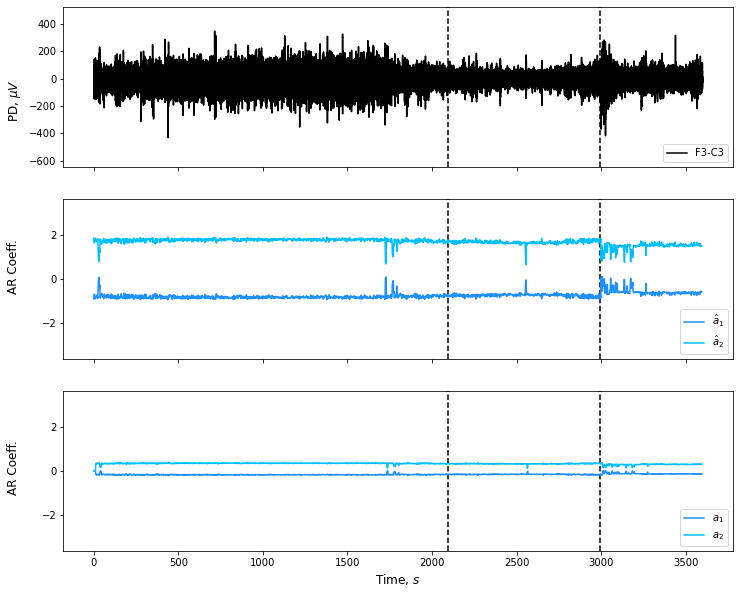

In [25]:
# top / nasion and left
ch_name = 'F3-C3'
ch_idx_F3 = ch_idx_F3 = ch_names.index(ch_name)
savepath = figroot + preictal_files[0].split('/')[-1].split('.')[0] + '_' + ch_name
plot_ARMA_response(raws_0_times, raws_0_times_ARMA,
                   raws_0_EEG, raws_0_sig_AR, raws_0_sig_MA,
                   ch_idx_F3, ch_names, N, fs, 2096, 2996, savepath, 'pdf')

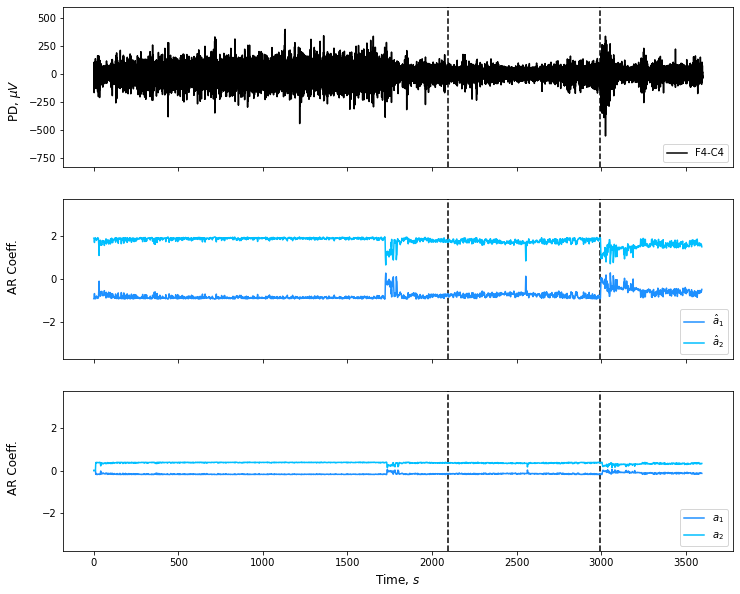

In [26]:
# top / nasion and right
ch_name = 'F4-C4'
ch_idx = ch_names.index(ch_name)
savepath = figroot + preictal_files[0].split('/')[-1].split('.')[0] + '_' + ch_name
plot_ARMA_response(raws_0_times, raws_0_times_ARMA,
                   raws_0_EEG, raws_0_sig_AR, raws_0_sig_MA,
                   ch_idx, ch_names, N, fs, 2096, 2996, savepath, 'pdf')

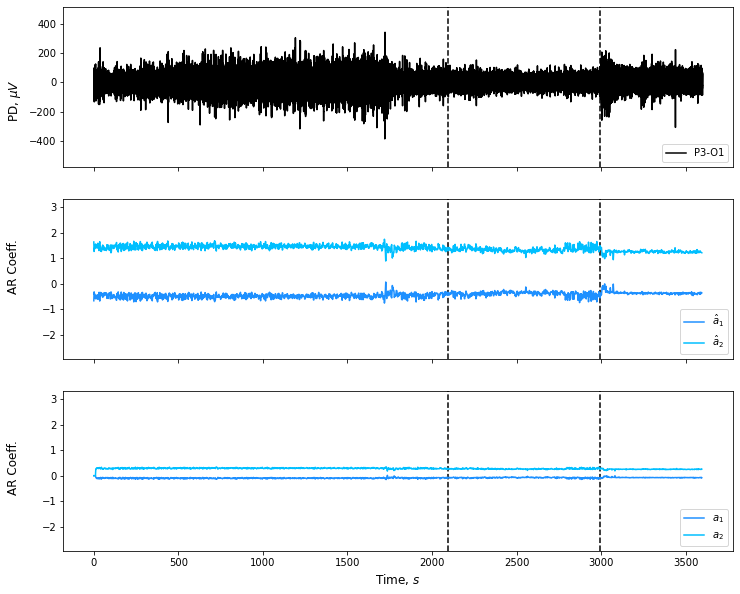

In [27]:
# bottom / inion and left
ch_name = 'P3-O1'
ch_idx = ch_names.index(ch_name)
savepath = figroot + preictal_files[0].split('/')[-1].split('.')[0] + '_' + ch_name
plot_ARMA_response(raws_0_times, raws_0_times_ARMA,
                   raws_0_EEG, raws_0_sig_AR, raws_0_sig_MA,
                   ch_idx, ch_names, N, fs, 2096, 2996, savepath, 'pdf')

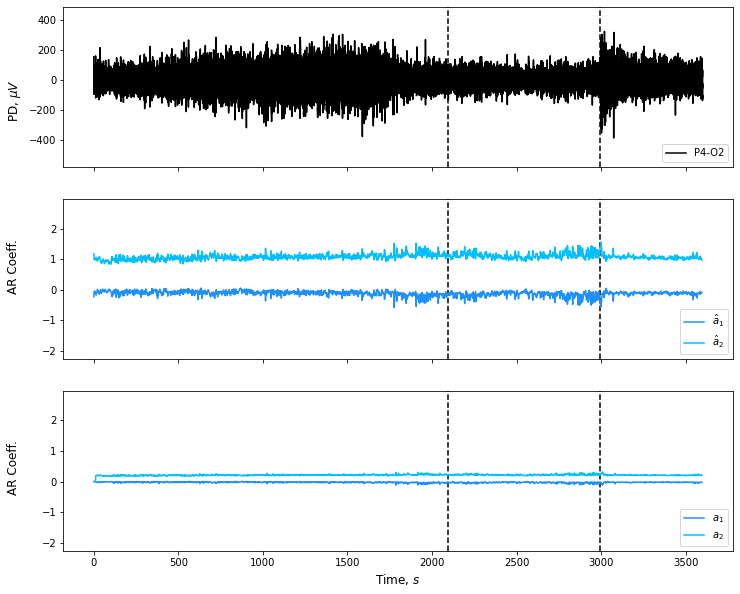

In [28]:
# bottom / inion and right
ch_name = 'P4-O2'
ch_idx = ch_names.index(ch_name)
savepath = figroot + preictal_files[0].split('/')[-1].split('.')[0] + '_' + ch_name
plot_ARMA_response(raws_0_times, raws_0_times_ARMA,
                   raws_0_EEG, raws_0_sig_AR, raws_0_sig_MA,
                   ch_idx, ch_names, N, fs, 2096, 2996, savepath, 'pdf')